In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Droping unnecessary column in the dataset

In [7]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [9]:
df.dropna().shape

(712, 8)

In [15]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [16]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-16-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [17]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2
age_mean,0


In [19]:
df.drop(['age_mean'],axis='columns',inplace=True)

In [22]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [23]:
df['Embarked'].fillna('S', inplace=True)

In [24]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


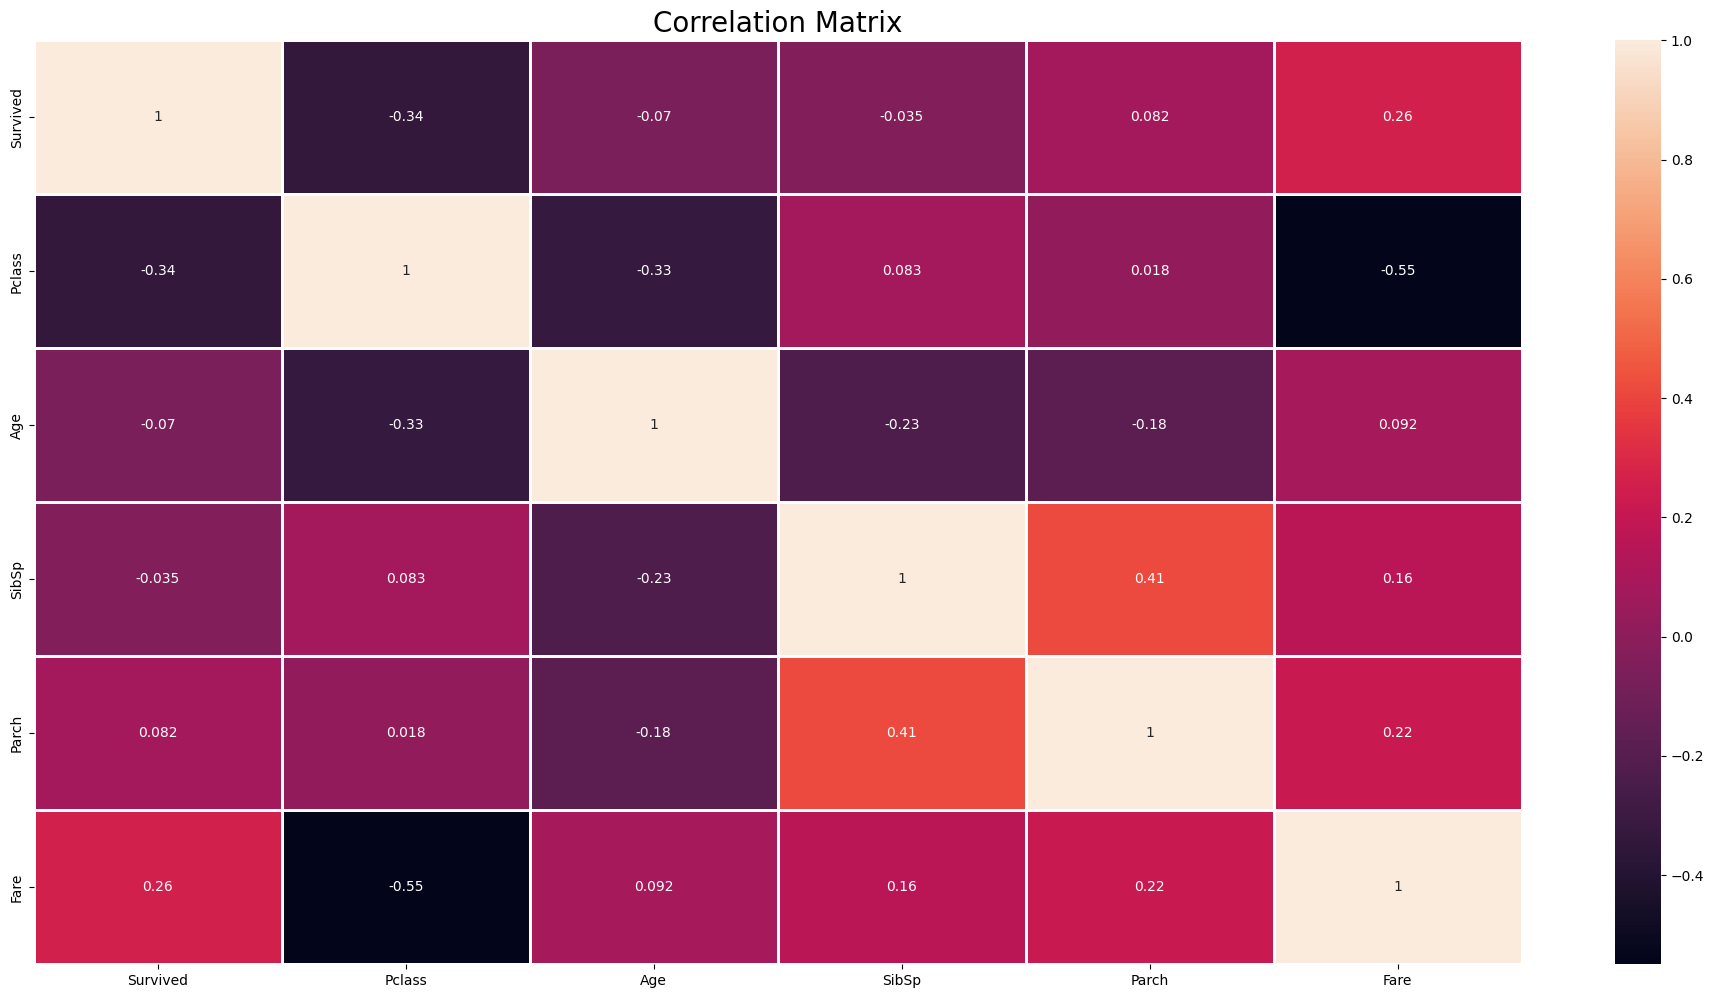

In [27]:
non_numeric_columns=df.select_dtypes(exclude=['number']).columns
df_numeric=df.drop(columns=non_numeric_columns)
corr=df_numeric.corr()
plt.figure(figsize=(24,12))
sns.heatmap(corr,annot=True,linewidths=1)
plt.title('Correlation Matrix',size=20)
plt.show()

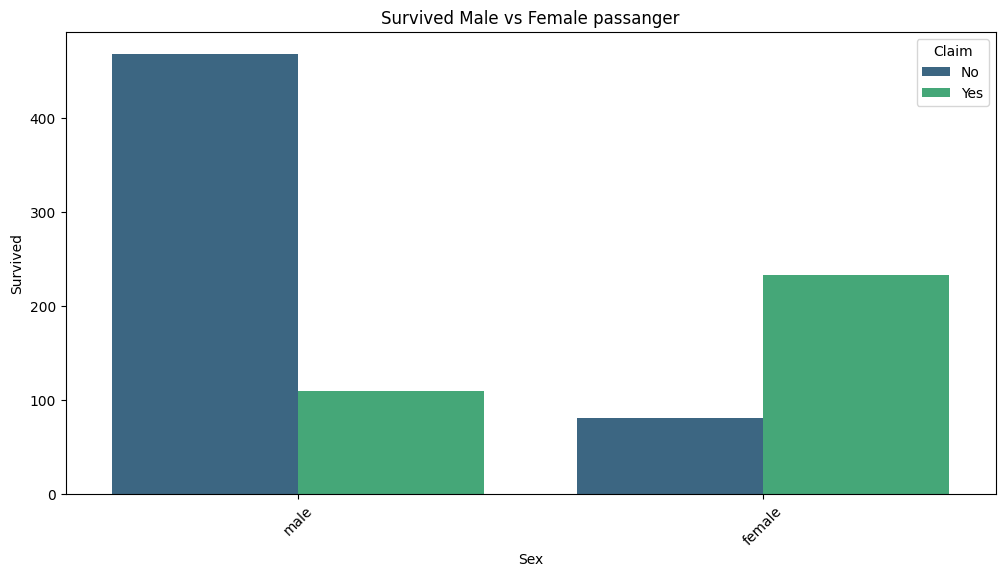

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survived Male vs Female passanger')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.legend(title='Claim', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

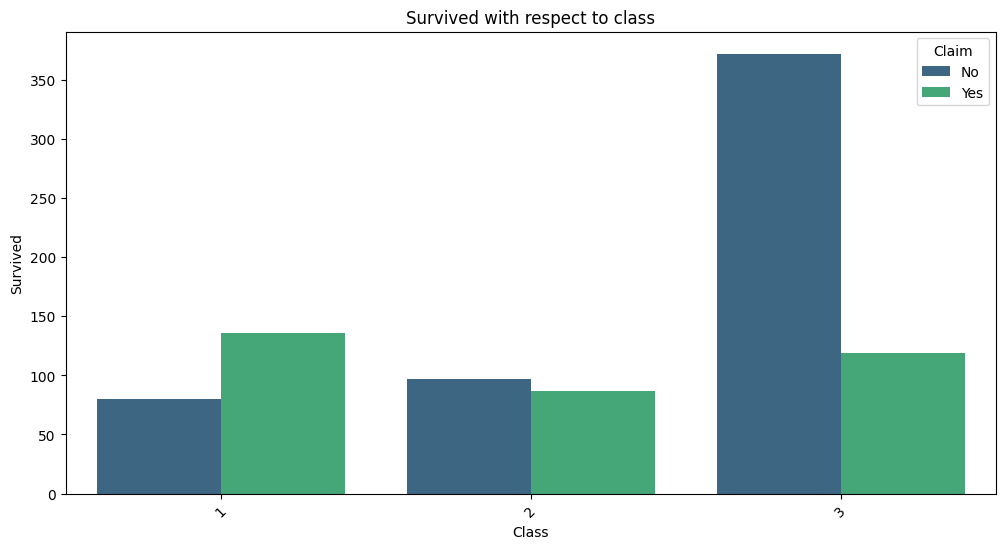

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survived with respect to class')
plt.xlabel('Class')
plt.ylabel('Survived')
plt.legend(title='Claim', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [36]:
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

In [37]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [39]:
df['Sex_male'] = df['Sex_male'].astype(int)

In [40]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,False,True
1,1,1,38.0,1,0,71.2833,0,False,False
2,1,3,26.0,0,0,7.9250,0,False,True
3,1,1,35.0,1,0,53.1000,0,False,True
4,0,3,35.0,0,0,8.0500,1,False,True


In [41]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)

In [42]:
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [43]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [44]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [45]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']
print(x.shape)
print(y.shape)

(891, 8)
(891,)


In [46]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [47]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [48]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **Random Forest Classifier**

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=100, criterion='entropy',bootstrap=True, oob_score=False)
rf.fit(x_train, y_train)
y_predict_test = rf.predict(x_test)

print(confusion_matrix(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test))
print(accuracy_score(y_test, y_predict_test))

[[92 13]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

0.8156424581005587


#Decission Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1, max_depth=14, criterion='gini')
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print(confusion_matrix(y_test, dtc_pred))
print(classification_report(y_test, dtc_pred))
print(accuracy_score(y_test, dtc_pred))

[[87 18]
 [24 50]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       105
           1       0.74      0.68      0.70        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179

0.7653631284916201


#KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))
print(accuracy_score(y_test, knn_y_pred))

[[85 20]
 [34 40]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       105
           1       0.67      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.69      0.70      0.69       179

0.6983240223463687


#Random Forest Classifier Accuracy 81%